# **SPAM Classifier**

The SMS Spam Collection is a set of SMS tagged messages that have been collected from SMS Spam research database. It contains one set of SMS messages in English of 5,572 messages, tagged acording being ham (legitimate) or spam. I'll use this dataset to build a prediction model that will accurately classifies which texts are spam using Logistic Regression with L2 Regularisation and CV (K=3).

In [ ]:
!pip install wordcloud

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np

In [116]:
spam_ham = pd.read_csv('spamhamtrain.csv')

First, let's check the data structure.

In [117]:
spam_ham.head()

,Category,Message
0,ham,"K I'm leaving soon, be there a little after 9"
1,ham,No. Yes please. Been swimming?
2,ham,It took Mr owl 3 licks
3,ham,Its going good...no problem..but still need li...
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...


And the frequency of each category.

In [118]:
spam_ham.groupby('Category').size()

Category
ham     3863
spam     594
dtype: int64

Now, let's see if we have any missing data.

In [119]:
spam_ham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4457 entries, 0 to 4456
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  4457 non-null   object
 1   Message   4457 non-null   object
dtypes: object(2)
memory usage: 69.8+ KB


As seen above, we have no missing data. Let's now see which are the most repeated messages for each categories and their frequencies.

In [120]:
spam_ham.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         3863   3635                             Sorry, I'll call later   
spam         594    522  Please call our customer service representativ...   

               
         freq  
Category       
ham        26  
spam        4

Let's visualize how 'spam' and 'ham' categories are distributed.

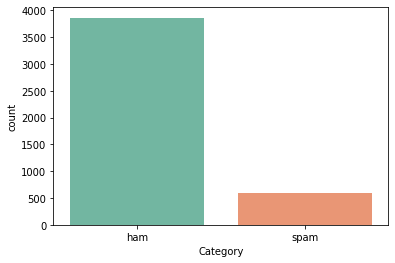

In [121]:
sns.countplot(x = 'Category', data = spam_ham, palette = 'Set2')

Let's calculate the length of each message. This may help predict our response variable because messages that are too short or too long may be flagged as spam.

In [122]:
spam_ham['length'] = spam_ham['Message'].apply(len)
spam_ham

,Category,Message,length
0,ham,"K I'm leaving soon, be there a little after 9",45
1,ham,No. Yes please. Been swimming?,30
2,ham,It took Mr owl 3 licks,22
3,ham,Its going good...no problem..but still need li...,102
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...,155
...,...,...,...
4452,ham,K:)k:)good:)study well.,23
4453,ham,"Chinatown got porridge, claypot rice, yam cake...",131
4454,ham,"Hmm... Dunno leh, mayb a bag 4 goigng out dat ...",116
4455,ham,Tell me whos this pls:-),24


Let's see the distribution of length for spam and ham.

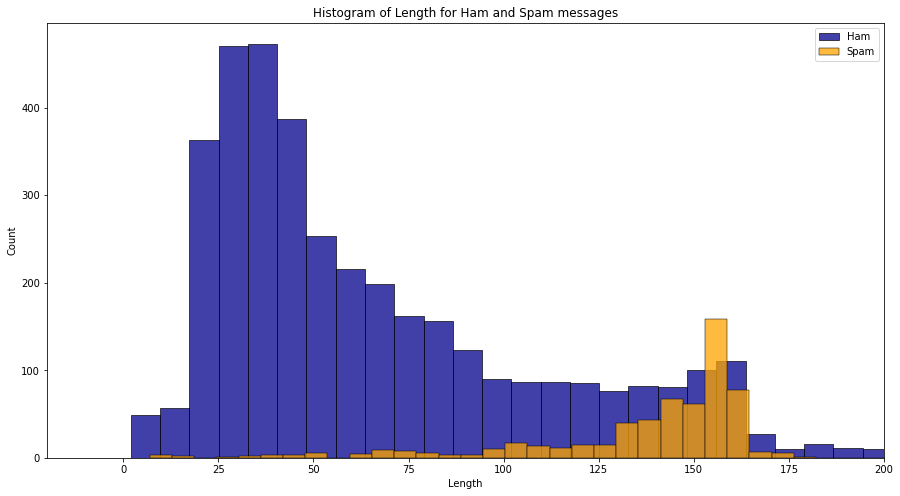

In [124]:
plt.figure(figsize=(15,8))
ax = sns.histplot(spam_ham["length"][spam_ham.Category == 'ham'], color="darkblue")
sns.histplot(spam_ham["length"][spam_ham.Category == 'spam'], color="orange")
plt.legend(['Ham', 'Spam'])
plt.title('Histogram of Length for Ham and Spam messages')
ax.set(xlabel='Length')
plt.xlim(-20,200)
plt.show()

As can be seen above, there is an imbalance in the distributions of spam and ham. There are much more observations for ham messages, this could cause a problem with logistic regression and throw off predictions. Additionally, spam messages tend to have a longer length. 

Let's see what words are most repeated for each case with a word cloud.

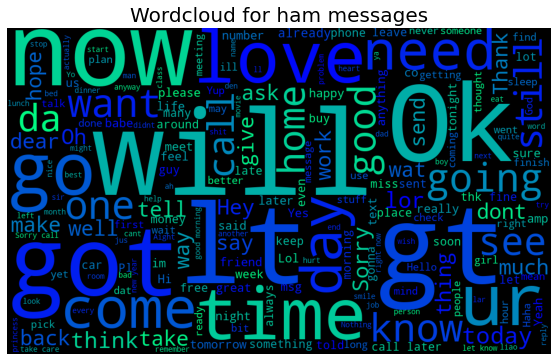

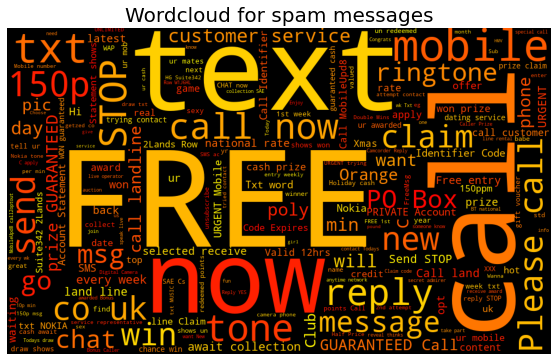

In [125]:
for cat, cmap in zip(["ham", "spam"], ["winter", "autumn"]):
    text = spam_ham.query("Category == @cat")["Message"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    cloud = WordCloud(width=1000, height=600, colormap=cmap)
    cloud.generate_from_text(text)
    plt.imshow(cloud)
    plt.axis("off")
    plt.title("Wordcloud for {} messages".format(cat), size=20)
    plt.show()

From the wordcloud we can see the most repeated words for ham and spam messages. In the case of ham, most repeated are will, love, gt, now, got. In the case of spam, most repeated are free, text, stop, mobile, call, etc.

Before training our model, let's create a spam dummy with 1 for spam.

In [126]:
spam_ham['spam'] = pd.get_dummies(spam_ham['Category'], drop_first=True)

In [127]:
spam_ham.head()

,Category,Message,length,spam
0,ham,"K I'm leaving soon, be there a little after 9",45,0
1,ham,No. Yes please. Been swimming?,30,0
2,ham,It took Mr owl 3 licks,22,0
3,ham,Its going good...no problem..but still need li...,102,0
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...,155,0


Now, let's create a count vectorizer to use in our regression instead of message.

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
spamham_vect = vect.fit_transform(spam_ham['Message'])

In [129]:
# Model training
X = spamham_vect
y = spam_ham['spam']

In [130]:
X.shape

(4457, 7718)

In [131]:
y.shape

(4457,)

In [132]:
from sklearn.linear_model import LogisticRegressionCV
from numpy import arange

In [133]:
# Running LogisticRegression CV to find the best hyperparameter C
logmodel = LogisticRegressionCV(Cs=arange(0.0001,10,0.01), cv=3, penalty='l2', max_iter=500)
logmodel.fit(X,y)

LogisticRegressionCV(Cs=array([1.0000e-04, 1.0100e-02, 2.0100e-02, 3.0100e-02, 4.0100e-02,
       5.0100e-02, 6.0100e-02, 7.0100e-02, 8.0100e-02, 9.0100e-02,
       1.0010e-01, 1.1010e-01, 1.2010e-01, 1.3010e-01, 1.4010e-01,
       1.5010e-01, 1.6010e-01, 1.7010e-01, 1.8010e-01, 1.9010e-01,
       2.0010e-01, 2.1010e-01, 2.2010e-01, 2.3010e-01, 2.4010e-01,
       2.5010e-01, 2.6010e-01, 2.7010e-01, 2.8010e-01,...
       9.7001e+00, 9.7101e+00, 9.7201e+00, 9.7301e+00, 9.7401e+00,
       9.7501e+00, 9.7601e+00, 9.7701e+00, 9.7801e+00, 9.7901e+00,
       9.8001e+00, 9.8101e+00, 9.8201e+00, 9.8301e+00, 9.8401e+00,
       9.8501e+00, 9.8601e+00, 9.8701e+00, 9.8801e+00, 9.8901e+00,
       9.9001e+00, 9.9101e+00, 9.9201e+00, 9.9301e+00, 9.9401e+00,
       9.9501e+00, 9.9601e+00, 9.9701e+00, 9.9801e+00, 9.9901e+00]),
                     cv=3, max_iter=500)

In [134]:
logmodel.C_ # best penalty hyperparameter

array([9.7101])

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [136]:
logmodel = LogisticRegression(C=9.7101, penalty='l2', max_iter=500)
cv_lg = cross_validate(logmodel,X,y, cv=3, scoring = ['accuracy','precision','recall'], return_estimator=True)
print("Accuracy per k: {} \nAverage accuracy: {}\n".format(cv_lg['test_accuracy'],cv_lg['test_accuracy'].mean()))
print("Precision per k: {}\nAverage precision: {}\n".format(cv_lg['test_precision'],cv_lg['test_precision'].mean()))
print("Recall per k: {}\nAverage recall: {}\n".format(cv_lg['test_recall'],cv_lg['test_recall'].mean()))

Accuracy per k: [0.98654105 0.97106326 0.97912458] 
Average accuracy: 0.9789096286628812

Precision per k: [0.98901099 0.97546012 0.98265896]
Average precision: 0.9823766904159826

Recall per k: [0.90909091 0.8030303  0.85858586]
Average recall: 0.8569023569023568



According to the results above, this model will classify spam messages with an average of 97.9% accuracy.

The average precision in 98.2%. Which indicates that from the emails that were marked as spam by the model (in the cross validation), an average of 98.2% were correctly marked (were actually spam). This is good because for spam detection we don't want false positives to occur, we don't want ham messages to be flagged as spam but we could spare some spam messages to go to ham.

For recall, we can see that from the actual spam messages, the model is able to correctly classify an average of 85.7%, which means that 14.3% of spam messages are being classified as ham.